<a href="https://colab.research.google.com/github/Valeria379/PROA/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%9F%D0%A0%D0%9E%D0%90_%E2%84%964_3_%D0%9C%D0%BE%D1%80%D0%BE%D0%B7%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Вариант 10. **неструктурированных данных: использование данных с веб-страницы, обеспечивающей информацией о самых кассовых фильмах на Филиппинах.

**1. Импорт данных и изучение характеристик наборов данных.**

In [ ]:
#importing the libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_the_Philippines'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]

In [ ]:
#изучаем первые 5 строк
df.head()

,Rank,Title,Year,Gross,Reference(s)
0,1,Avengers: Endgame,2019,"₱1,704,239,738",[1]
1,2,Avengers: Infinity War,2018,"₱1,217,254,549",[2]
2,3,"Hello, Love, Goodbye",2019,"₱880,603,490",[3][4]
3,4,Frozen II,2019,"₱816,036,673",[5]
4,5,The Hows of Us,2018,"₱805,000,000",[6][7]


In [ ]:
df

,Rank,Title,Year,Gross,Reference(s)
0,1,Avengers: Endgame,2019,"₱1,704,239,738",[1]
1,2,Avengers: Infinity War,2018,"₱1,217,254,549",[2]
2,3,"Hello, Love, Goodbye",2019,"₱880,603,490",[3][4]
3,4,Frozen II,2019,"₱816,036,673",[5]
4,5,The Hows of Us,2018,"₱805,000,000",[6][7]
5,6,Beauty and the Beast,2017,"₱686,072,421",[8]
6,7,Captain America: Civil War,2016,"₱667,400,000",[8]
7,8,Captain Marvel,2019,"₱645,802,803",[9]
8,9,Avengers: Age of Ultron,2015,"₱634,243,871",[10]
9,10,Iron Man 3,2013,"₱625,840,211",[11]


In [ ]:
#информация о типе данных каждого столбца 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          20 non-null     int64 
 1   Title         20 non-null     object
 2   Year          20 non-null     int64 
 3   Gross         20 non-null     object
 4   Reference(s)  20 non-null     object
dtypes: int64(2), object(3)
memory usage: 928.0+ bytes


In [ ]:
#размер набора данных
df.shape 

(20, 5)

In [ ]:
#Получение сводной статистики для каждого столбца 
df.describe()

,Rank,Year
count,20.00000,20.000000
mean,10.50000,2017.050000
std,5.91608,2.139233
min,1.00000,2012.000000
25%,5.75000,2015.750000
50%,10.50000,2018.000000
75%,15.25000,2019.000000
max,20.00000,2019.000000


**2. Обработка данных**

In [ ]:
#Удаление всех посторонних символов
df['Gross']=df['Gross'].str.replace(r"₱","").str.replace(r",","")

In [ ]:
df

,Rank,Title,Year,Gross,Reference(s)
0,1,Avengers: Endgame,2019,1704239738,[1]
1,2,Avengers: Infinity War,2018,1217254549,[2]
2,3,"Hello, Love, Goodbye",2019,880603490,[3][4]
3,4,Frozen II,2019,816036673,[5]
4,5,The Hows of Us,2018,805000000,[6][7]
5,6,Beauty and the Beast,2017,686072421,[8]
6,7,Captain America: Civil War,2016,667400000,[8]
7,8,Captain Marvel,2019,645802803,[9]
8,9,Avengers: Age of Ultron,2015,634243871,[10]
9,10,Iron Man 3,2013,625840211,[11]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          20 non-null     int64 
 1   Title         20 non-null     object
 2   Year          20 non-null     int64 
 3   Gross         20 non-null     object
 4   Reference(s)  20 non-null     object
dtypes: int64(2), object(3)
memory usage: 928.0+ bytes


In [ ]:
#изменение типа данных
df['Gross']=df['Gross'].astype('int64')

In [ ]:
df['Gross'].head(5)

0    1704239738
1    1217254549
2     880603490
3     816036673
4     805000000
Name: Gross, dtype: int64

In [ ]:
#переименовываем Title в Film
df.rename(columns={'Title':'Film'}, inplace=True)

In [ ]:
df

,Rank,Film,Year,Gross,Reference(s)
0,1,Avengers: Endgame,2019,1704239738,[1]
1,2,Avengers: Infinity War,2018,1217254549,[2]
2,3,"Hello, Love, Goodbye",2019,880603490,[3][4]
3,4,Frozen II,2019,816036673,[5]
4,5,The Hows of Us,2018,805000000,[6][7]
5,6,Beauty and the Beast,2017,686072421,[8]
6,7,Captain America: Civil War,2016,667400000,[8]
7,8,Captain Marvel,2019,645802803,[9]
8,9,Avengers: Age of Ultron,2015,634243871,[10]
9,10,Iron Man 3,2013,625840211,[11]


In [ ]:
#удаляем ненужный столбец
df.drop(['Reference(s)'],axis=1,inplace=True)

In [ ]:
df

,Rank,Film,Year,Gross
0,1,Avengers: Endgame,2019,1704239738
1,2,Avengers: Infinity War,2018,1217254549
2,3,"Hello, Love, Goodbye",2019,880603490
3,4,Frozen II,2019,816036673
4,5,The Hows of Us,2018,805000000
5,6,Beauty and the Beast,2017,686072421
6,7,Captain America: Civil War,2016,667400000
7,8,Captain Marvel,2019,645802803
8,9,Avengers: Age of Ultron,2015,634243871
9,10,Iron Man 3,2013,625840211


In [ ]:
#проверка на наличие нулевых значений
df.isna().sum().sum()/len(df)

0.0

Нулевых значений нет

**3. Визуализация**

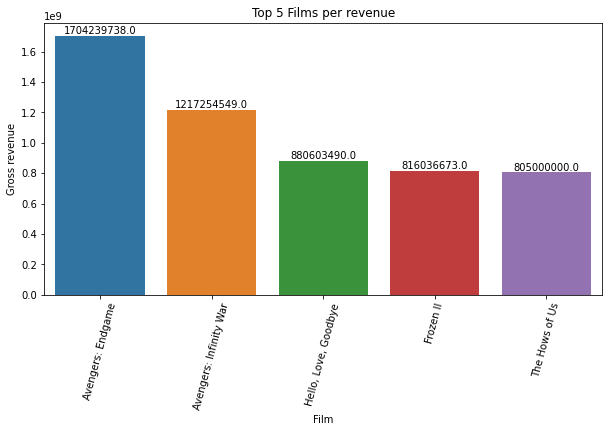

In [ ]:
#Plotting the top 5 films by revenue
#setting the figure size
plt.figure(figsize=(10,5))
#creating a bar plot
ax=sns.barplot(x='Film',y='Gross',data=df.head(5))
#rotating the x axis labels
ax.set_xticklabels(labels=df.head()['Film'],rotation=75)
#setting the title
ax.set_title("Top 5 Films per revenue")
#setting the Y-axis labels
ax.set_ylabel("Gross revenue")
#Labelling the bars in the bar graph
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

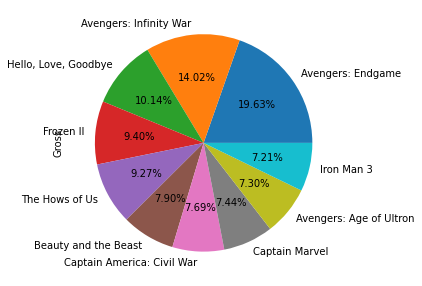

In [ ]:
df['Gross'].head(10).plot(kind='pie',autopct='%.2f%%',labels=df['Film'],
figsize=(10,5))

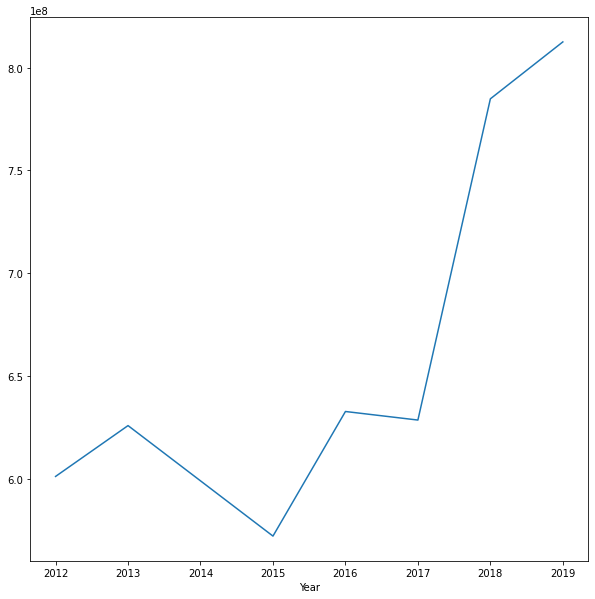

In [ ]:
#Aggregating the revenues by month
df2=df.groupby('Year')['Gross'].mean()
#creating a line plot
df2.plot(kind='line',figsize=(10,10))

**Вывод**

Исходя из первой и второй диаграммы можно сделать вывод, что наибольшую выручку и популярность на Филиппинах получили фильмы о Мстителях, остальные же имели приблизительно одинаковый уровень востребованности. 

На графике хорошо видно, как в 2015 году был сильный упадок в походах в кино и просмотрах фильмов, а скачок наблюдался в 2018-2019 годах, как раз в то время, когда вышли 2 части Мстителей и большинство других фильмов, получивших хорошую выручку и популярность на Филиппинах.